## Import Library

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston 
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import scorer, accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

#plt.rcParams['figure.figsize'] = [20, 7]

## load dataset

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,1,623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,2,4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,3,6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,4,6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [4]:
data.shape
data.Class.value_counts()

0    9000
1     492
Name: Class, dtype: int64

In [5]:
# separate fraudulent and non fraudulent data
data_0 = data[data['Class'] == 0]
data_1 = data[data['Class'] == 1]

In [6]:
# take only 9000 0's sameple
data_0 = data_0.sample(n=9000)

In [7]:
data = data_1.append(data_0)

data.Class.value_counts()

/var/folders/94/x_h3vf1d7vg3nbb39fj2jf0r0000gn/T/ipykernel_64419/1730244312.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_1.append(data_0)


0    9000
1     492
Name: Class, dtype: int64

In [8]:
# save as csv
data.to_csv('creditcard.csv')

In [9]:
# check the number of 1s and 0s
count = data['Class'].value_counts()

print('Fraudulent "1" :', count[1])
print('Not Fraudulent "0":', count[0])

# print the percentage of question where target == 1
print(count[1]/count[0]* 100)

Fraudulent "1" : 492
Not Fraudulent "0": 9000
5.466666666666667


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (2).

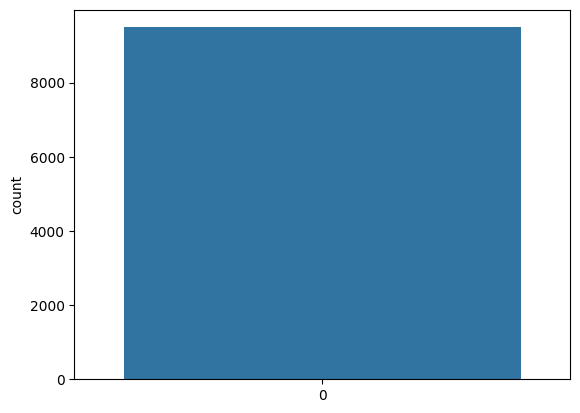

In [10]:
# plot the no of 1's and 0's
g = sns.countplot(data['Class'])
g.set_xticklabels(['Not Fraud', 'Fraud'])
plt.show()

In [11]:
# check for null values
data.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Time            0
V1              0
V2              0
V3              0
V4              0
V5              0
V6              0
V7              0
V8              0
V9              0
V10             0
V11             0
V12             0
V13             0
V14             0
V15             0
V16             0
V17             0
V18             0
V19             0
V20             0
V21             0
V22             0
V23             0
V24             0
V25             0
V26             0
V27             0
V28             0
Amount          0
Class           0
dtype: int64

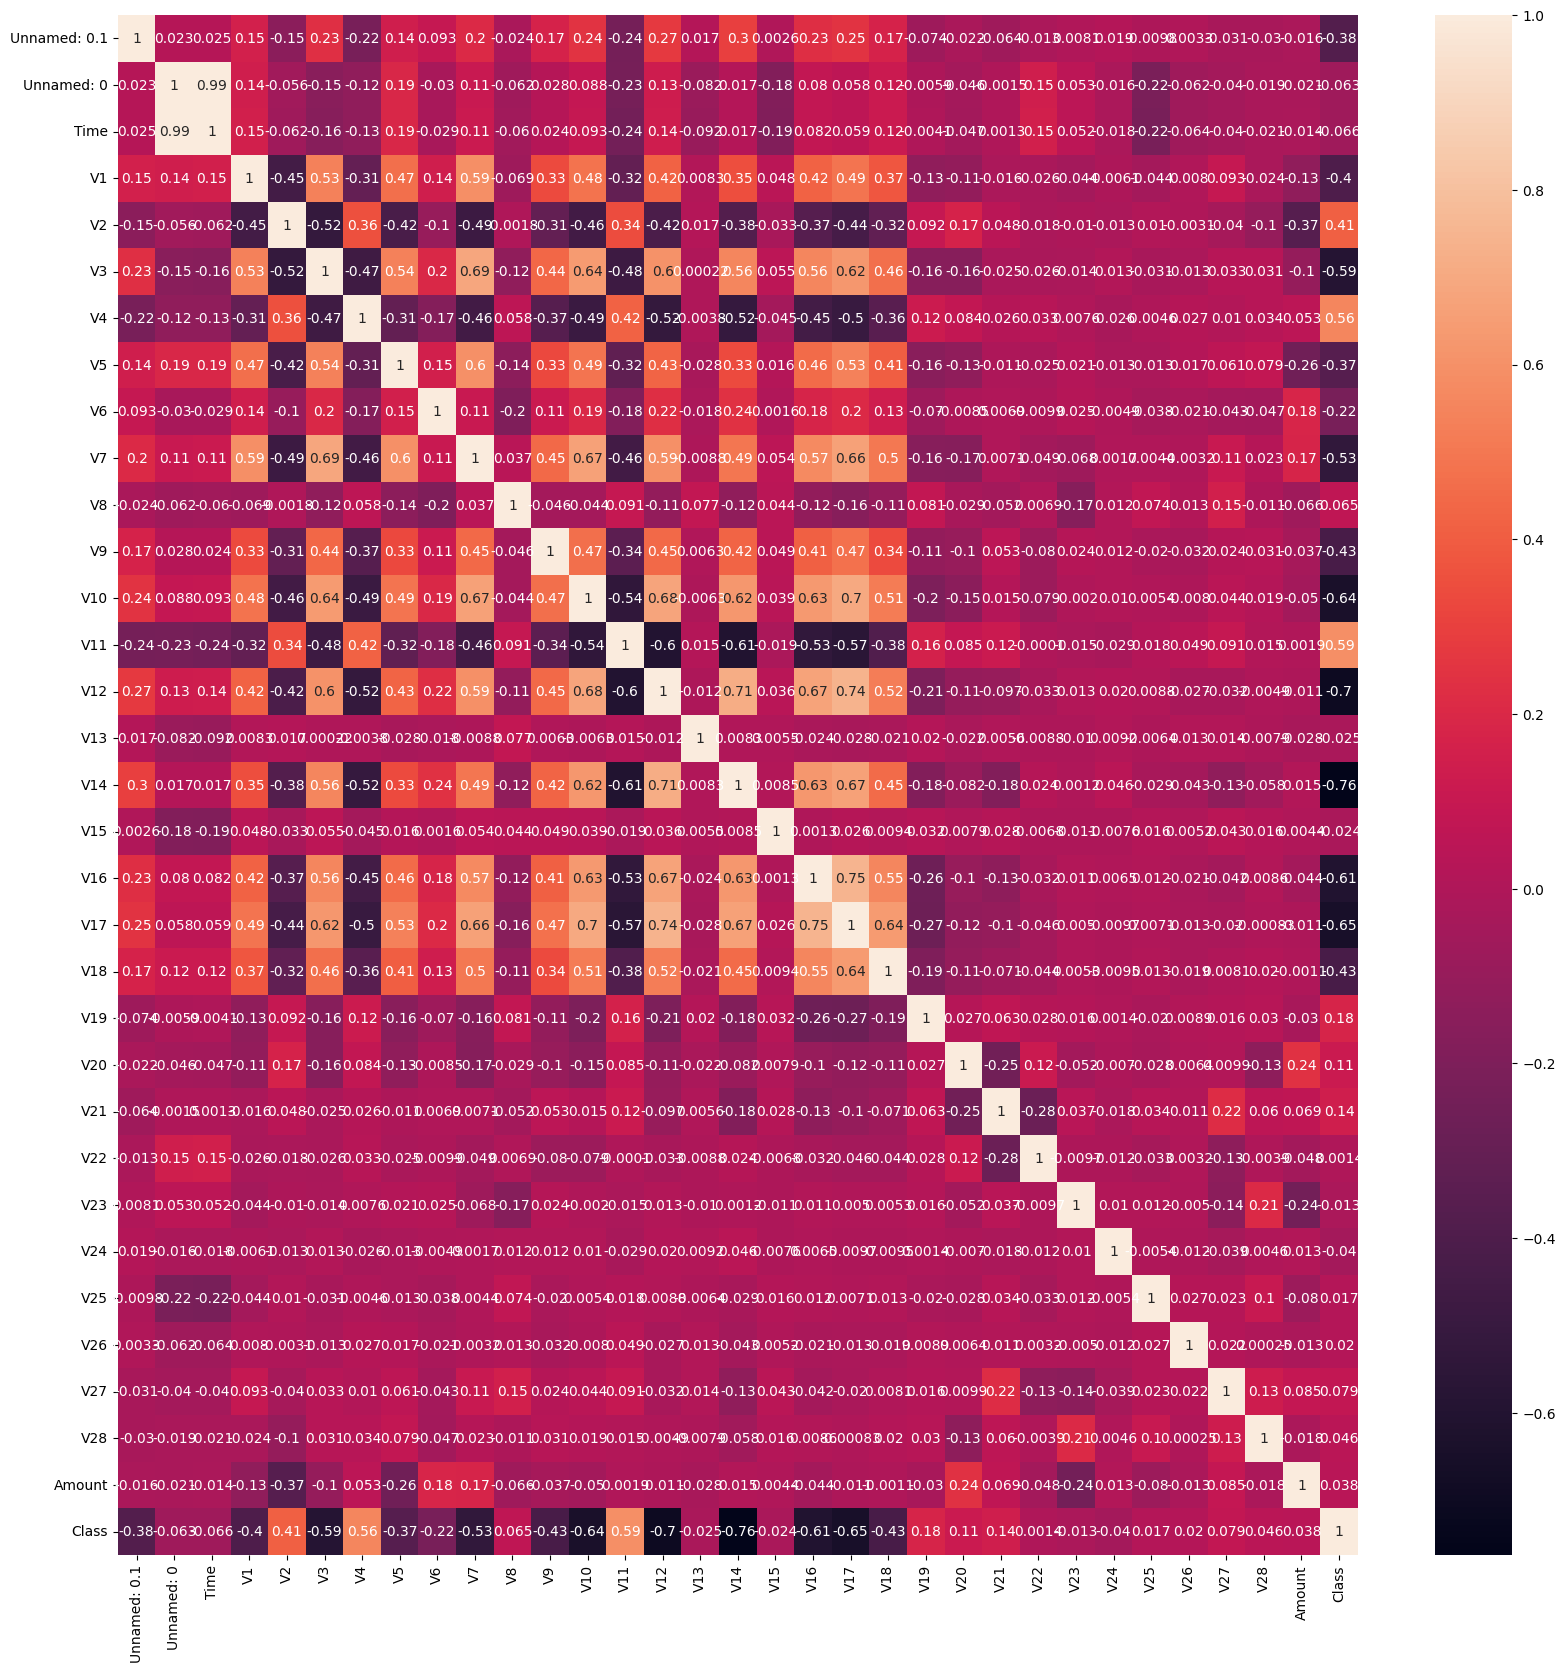

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Respose and Target variable

In [13]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# check length of 1's and 0's
one = np.where(y==1)
zero = np.where(y==0)
len(one[0]), len(zero[0])

(492, 9000)

## Train test split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Fit the model uing Logitic Regression

In [15]:
# create the object
model =  LogisticRegression()

model.fit(x, y)

y_predict = model.predict(x)

/Users/admin/Projects/credit_card_fraud/credit/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
accuracy_score(y_predict, y)

0.9996839443742098

In [17]:
np.unique(y_predict)

array([0, 1])

## The matrix trap

In [18]:
# import linrary
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(x_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(x_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)

print('Accuracy score is:', xgb_score)
print('Roc auc scote:', roc_auc_score(xgb_y_predict, y_test))
print('F1 core:',f1_score(xgb_y_predict, y_test))

Accuracy score is: 1.0
Roc auc scote: 1.0
F1 core: 1.0


In [19]:
confusion_matrix(xgb_y_predict, y_test)

array([[1800,    0],
       [   0,   99]])

##  Resampling Technique

In [20]:
# class count
class_count_0, class_count_1 = data['Class'].value_counts()

# divie class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]

In [21]:
# print the shape of the class
print('class 0:', class_0.shape)
print('\nclass 1:', class_1.shape)

class 0: (9000, 33)

class 1: (492, 33)


## 1. Random under sampling

total class of 1 and 0:
 0    492
1    492
Name: Class, dtype: int64


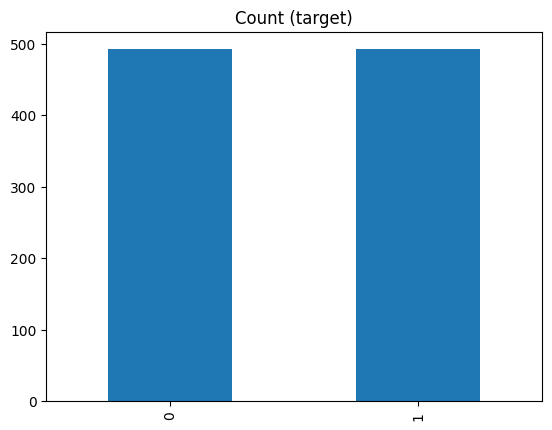

In [22]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:\n",test_under['Class'].value_counts())

test_under['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

## 2. Random over sampling

class count of 1 and 0:
 1    9000
0    9000
Name: Class, dtype: int64


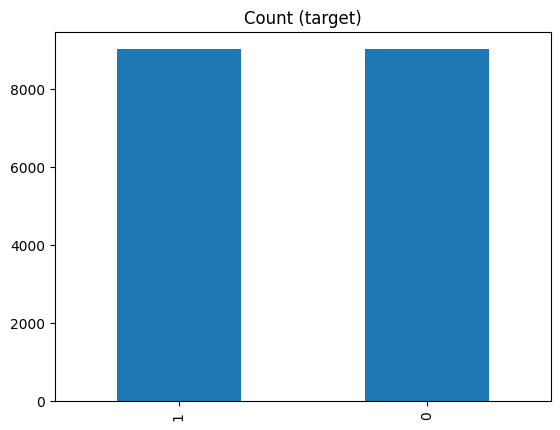

In [23]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_under = pd.concat([class_1_over, class_0], axis=0)

# print the number of class count
print('class count of 1 and 0:\n', test_under['Class'].value_counts())

# plot the count
test_under['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

## Balance data with imbalance learn module

In [24]:
# import library
import sklearn
import imblearn 


## 3. Random under-sampling with imblearn

In [25]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 9000, 1: 492})
Resample dataset shape Counter({0: 492, 1: 492})


## 4.Random over-sampling with imblearn

In [26]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target varaible
x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 9000, 1: 492})
Resample dataset shape Counter({1: 9000, 0: 9000})


## 5. under-sampling Tomek links

In [27]:
# load library
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = tl.oversample.fit_resample(x,y)


print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_tl))

AttributeError: 'TomekLinks' object has no attribute 'oversample'

In [ ]:
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import TomekLinks

In [ ]:
from sklearn.datasets import make_classification

## 6. Synthetic minority over-sampleing technique

In [ ]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit target and predictor variable
x_smote , y_smote = smote.fit_sample(x, y)

print('Origianl dataset shape:', Counter(y))
print('Resampple dataset shape:', Counter(y_smote))

## 7. NearMiss

In [28]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(x, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 9000, 1: 492})
Resample dataset shape: Counter({0: 492, 1: 492})


## 8. Change the performance metric

In [29]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_nm, y_nm, test_size =0.20, random_state=42)

m = XGBClassifier()
m.fit(x_train1, y_train1)
predict_y = m.predict(x_test1)

print('ROCAUC score:',roc_auc_score(y_test1, predict_y))
print('Accuracy score:',accuracy_score(y_test1, predict_y))
print('F1 score:',f1_score(y_test1, predict_y))

ROCAUC score: 0.994949494949495
Accuracy score: 0.9949238578680203
F1 score: 0.9949238578680203


## 9. penalize algorithm (cost-sensitive training)

In [30]:
# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(x_train, y_train)

svc_predict = svc_model.predict(x_test)

In [31]:
# check performance

print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))

ROCAUC score: 0.8441666666666667
Accuracy score: 0.7045813586097947
F1 score: 0.2608695652173913


## 10. Tree based algorithm

In [32]:
# load library
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_train, y_train)

# predict
rfc_predict = rfc.predict(x_test)

In [33]:
# check performance

print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

ROCAUC score: 1.0
Accuracy score: 1.0
F1 score: 1.0


In [71]:
rfc_predict

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
y_train

7100    0
5498    0
2244    0
1055    0
8997    0
       ..
1349    0
6526    0
5198    0
6539    0
5091    0
Name: Class, Length: 7593, dtype: int64

In [36]:
x_test

,Unnamed: 0.1,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
6618,2576,1349,1051.0,-0.838376,1.327227,1.037818,-0.056249,-0.087202,-1.126234,1.131148,...,-0.114637,0.113111,0.167948,-0.146024,0.789217,0.046817,0.345751,-0.690742,0.021976,36.26
1408,4488,104548,69120.0,-1.575165,-0.702298,1.149852,-1.650154,0.593236,-1.037805,0.483605,...,-0.166401,-0.043235,0.111349,-0.382509,-0.104526,0.333765,-0.810326,-0.039219,-0.116053,143.77
1472,5056,232107,147047.0,1.979984,-0.444818,-0.582106,0.173363,-0.203772,0.441453,-0.736386,...,-0.131450,0.210399,0.815851,0.070707,0.231425,-0.020586,-0.235381,0.035443,-0.043743,9.99
5964,9200,198639,132584.0,0.776585,0.210999,0.025874,-0.335264,0.192492,-0.404238,0.400709,...,0.549871,0.561381,1.941749,-0.120072,0.861410,-1.023306,0.268626,0.134911,0.044031,15.00
9205,6045,88919,62347.0,-0.564960,1.004740,0.910507,-0.101886,0.596849,-0.571179,0.688162,...,0.136746,-0.308230,-0.770991,0.056055,-0.505538,0.006441,0.117124,0.139672,0.067742,2.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,4688,169456,119713.0,-0.943277,0.916529,1.117141,-0.104379,-0.864402,0.662278,-0.099274,...,-0.185033,0.178574,0.445097,-0.104796,0.477755,-0.476117,-0.299816,-0.250184,0.071623,90.71
9227,1120,146898,87949.0,0.111822,0.952181,-0.133917,-0.402572,0.588427,-1.129644,1.057540,...,-0.036551,0.368475,1.347236,-0.140529,-0.045288,-0.799697,-0.212435,0.513895,0.320588,0.89
8835,4200,106785,70123.0,1.233767,-1.506945,0.919264,-1.035264,-1.743134,0.340422,-1.334112,...,-0.197523,-0.146703,0.177482,-0.061724,0.268644,0.403414,-0.100308,0.071070,0.022571,80.27
9360,4839,92774,64091.0,0.766601,-1.566237,0.739878,-0.049914,-1.512148,0.226164,-0.730168,...,0.280371,0.007204,-0.088224,-0.342754,-0.391111,0.121908,0.592813,-0.011150,0.084404,318.99


In [37]:
import joblib 

In [38]:
joblib.dump(rfc, "randomForestClassifier")

['randomForestClassifier']

In [39]:
x_test

,Unnamed: 0.1,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
6618,2576,1349,1051.0,-0.838376,1.327227,1.037818,-0.056249,-0.087202,-1.126234,1.131148,...,-0.114637,0.113111,0.167948,-0.146024,0.789217,0.046817,0.345751,-0.690742,0.021976,36.26
1408,4488,104548,69120.0,-1.575165,-0.702298,1.149852,-1.650154,0.593236,-1.037805,0.483605,...,-0.166401,-0.043235,0.111349,-0.382509,-0.104526,0.333765,-0.810326,-0.039219,-0.116053,143.77
1472,5056,232107,147047.0,1.979984,-0.444818,-0.582106,0.173363,-0.203772,0.441453,-0.736386,...,-0.131450,0.210399,0.815851,0.070707,0.231425,-0.020586,-0.235381,0.035443,-0.043743,9.99
5964,9200,198639,132584.0,0.776585,0.210999,0.025874,-0.335264,0.192492,-0.404238,0.400709,...,0.549871,0.561381,1.941749,-0.120072,0.861410,-1.023306,0.268626,0.134911,0.044031,15.00
9205,6045,88919,62347.0,-0.564960,1.004740,0.910507,-0.101886,0.596849,-0.571179,0.688162,...,0.136746,-0.308230,-0.770991,0.056055,-0.505538,0.006441,0.117124,0.139672,0.067742,2.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,4688,169456,119713.0,-0.943277,0.916529,1.117141,-0.104379,-0.864402,0.662278,-0.099274,...,-0.185033,0.178574,0.445097,-0.104796,0.477755,-0.476117,-0.299816,-0.250184,0.071623,90.71
9227,1120,146898,87949.0,0.111822,0.952181,-0.133917,-0.402572,0.588427,-1.129644,1.057540,...,-0.036551,0.368475,1.347236,-0.140529,-0.045288,-0.799697,-0.212435,0.513895,0.320588,0.89
8835,4200,106785,70123.0,1.233767,-1.506945,0.919264,-1.035264,-1.743134,0.340422,-1.334112,...,-0.197523,-0.146703,0.177482,-0.061724,0.268644,0.403414,-0.100308,0.071070,0.022571,80.27
9360,4839,92774,64091.0,0.766601,-1.566237,0.739878,-0.049914,-1.512148,0.226164,-0.730168,...,0.280371,0.007204,-0.088224,-0.342754,-0.391111,0.121908,0.592813,-0.011150,0.084404,318.99


'{"columns": ["Unnamed: 0.1", "Unnamed: 0", "Time", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Amount"], "index": [6618], "data": [[2576, 1349, 1051.0, -0.8383763026, 1.3272271739, 1.0378180024, -0.0562493904, -0.0872017454, -1.1262344403, 1.1311480327, -0.5284315542, -0.4961861883, 0.0387659992, 0.0673407565, 0.5604188588, 1.0171230243, -0.0890576835, 0.491357865, -0.2739560334, -0.2458941711, -0.6269665841, -0.0517704084, -0.1146372414, 0.113110764, 0.1679483357, -0.1460244322, 0.7892171522, 0.0468165638, 0.3457513954, -0.6907417194, 0.0219756668, 36.26]]}'

,Unnamed: 0.1,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
6618,2576,1349,1051.0,-0.838376,1.327227,1.037818,-0.056249,-0.087202,-1.126234,1.131148,...,-0.114637,0.113111,0.167948,-0.146024,0.789217,0.046817,0.345751,-0.690742,0.021976,36.26


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 239.2 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  DEPRECATION: jsonlib is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for jsonlib ... error
  error: subprocess-exited-with-error
  
  × Running setup.py install for jsonlib did not run successfully.
  │ exit code: 1
  ╰─> [448 lines of output]
      running install
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-x86_64-3.9
      copying jsonlib.py -> build/lib.macosx-10.9-x86_64-3.9
      running build_ext
      building '_jsonlib' extension
      creating build/temp.macosx-10.9-x86_64-3.9
      clang -Wno

Note: you may need to restart the kernel to use updated packages.


In [52]:
import jsonlib

ModuleNotFoundError: No module named 'jsonlib'

array([[ 2.57600000e+03,  1.34900000e+03,  1.05100000e+03,
        -8.38376303e-01,  1.32722717e+00,  1.03781800e+00,
        -5.62493904e-02, -8.72017454e-02, -1.12623444e+00,
         1.13114803e+00, -5.28431554e-01, -4.96186188e-01,
         3.87659992e-02,  6.73407565e-02,  5.60418859e-01,
         1.01712302e+00, -8.90576835e-02,  4.91357865e-01,
        -2.73956033e-01, -2.45894171e-01, -6.26966584e-01,
        -5.17704084e-02, -1.14637241e-01,  1.13110764e-01,
         1.67948336e-01, -1.46024432e-01,  7.89217152e-01,
         4.68165638e-02,  3.45751395e-01, -6.90741719e-01,
         2.19756668e-02,  3.62600000e+01]])